<a href="https://colab.research.google.com/github/rm0anand/ppdd/blob/main/Postpartum_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of ML Algorithms in prediction of Postpartum Depression

## 1.Loading Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## 2.Exploratory data analysis

### 2.1)Loading data

In [2]:
ppdd = pd.read_csv("https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv")

### 2.2)Exploring and cleaning data

In [3]:
ppdd.shape

(1503, 11)

In [4]:
ppdd.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [5]:
ppdd.tail()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No
1502,6/15/2022 0:36,45-50,Sometimes,Sometimes,Two or more days a week,No,No,No,Maybe,No,No


In [6]:
ppdd.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


### Data Ananlysis

In [7]:
ppdd.columns.values

array(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby and partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious',
       'Feeling of guilt', 'Problems of bonding with baby',
       'Suicide attempt'], dtype=object)

In [8]:
ppdd.drop('Timestamp', axis=1, inplace=True)

In [9]:
ppdd =ppdd.dropna(axis=0)

In [10]:
# To clean column name
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
ppdd.columns

Index(['age', 'feeling_sad_or_tearful', 'irritable_towards_baby_and_partner',
       'trouble_sleeping_at_night',
       'problems_concentrating_or_making_decision',
       'overeating_or_loss_of_appetite', 'feeling_anxious', 'feeling_of_guilt',
       'problems_of_bonding_with_baby', 'suicide_attempt'],
      dtype='object')

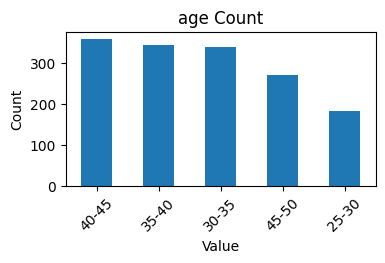

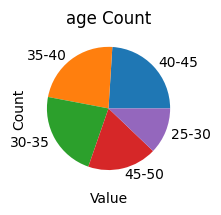

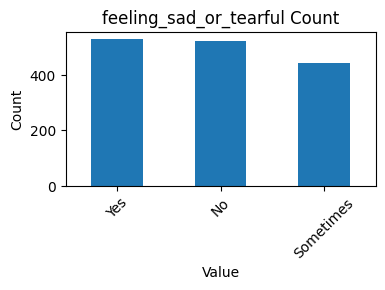

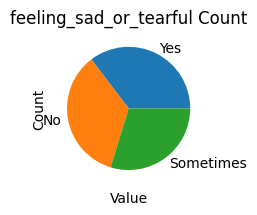

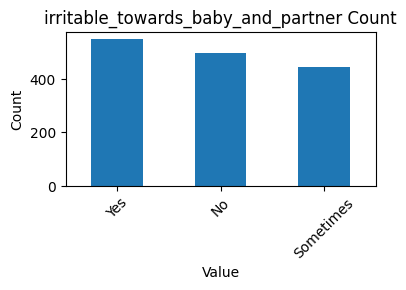

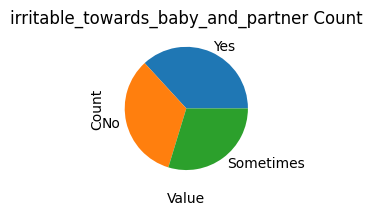

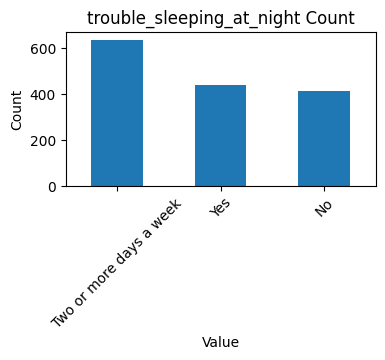

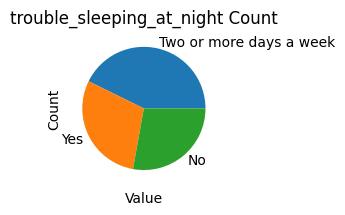

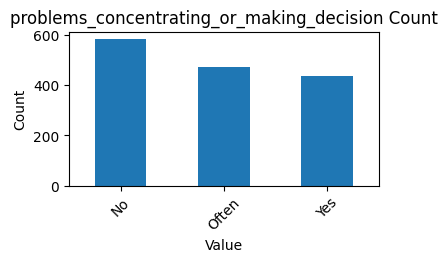

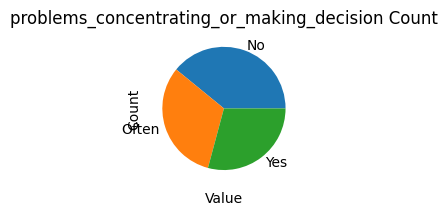

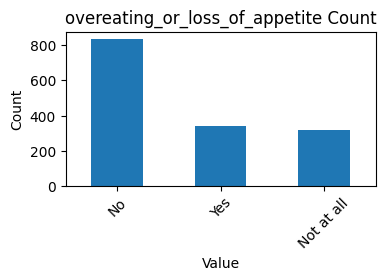

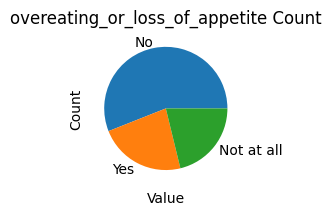

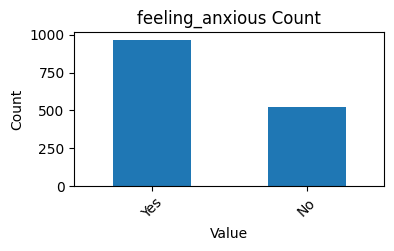

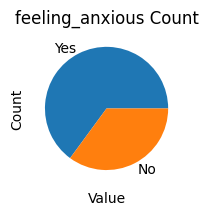

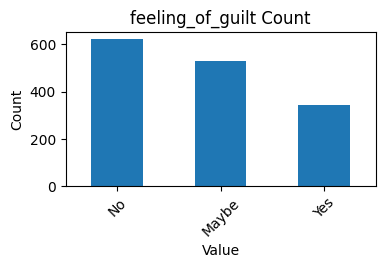

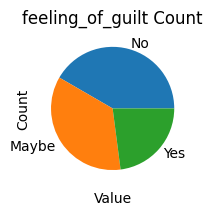

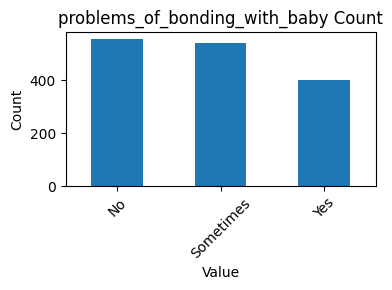

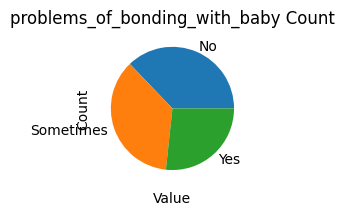

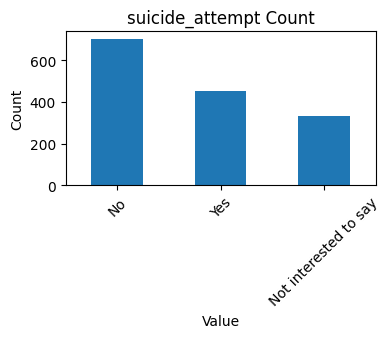

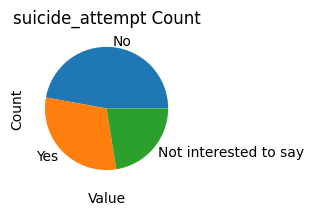

In [12]:
cols = ppdd.columns
for col in cols:
    counts = ppdd[col].value_counts()
    percentages = ppdd[col].value_counts(normalize=True) * 100

    plt.figure(figsize=(4, 2))
    counts.plot(kind='bar')
    plt.title(f'{col} Count')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(4, 2))
    counts.plot(kind='pie')
    plt.title(f'{col} Count')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


    print()

In [13]:
ppdd.head()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [17]:
ppdd.head()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0


In [19]:
ppdd.tail()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
1498,1,2,0,1,0,0,1,0,1,0
1499,0,1,0,0,1,0,1,0,2,0
1500,0,0,1,1,0,0,0,2,0,1
1501,0,0,1,2,1,0,1,1,0,0
1502,4,1,1,1,0,0,0,0,0,0


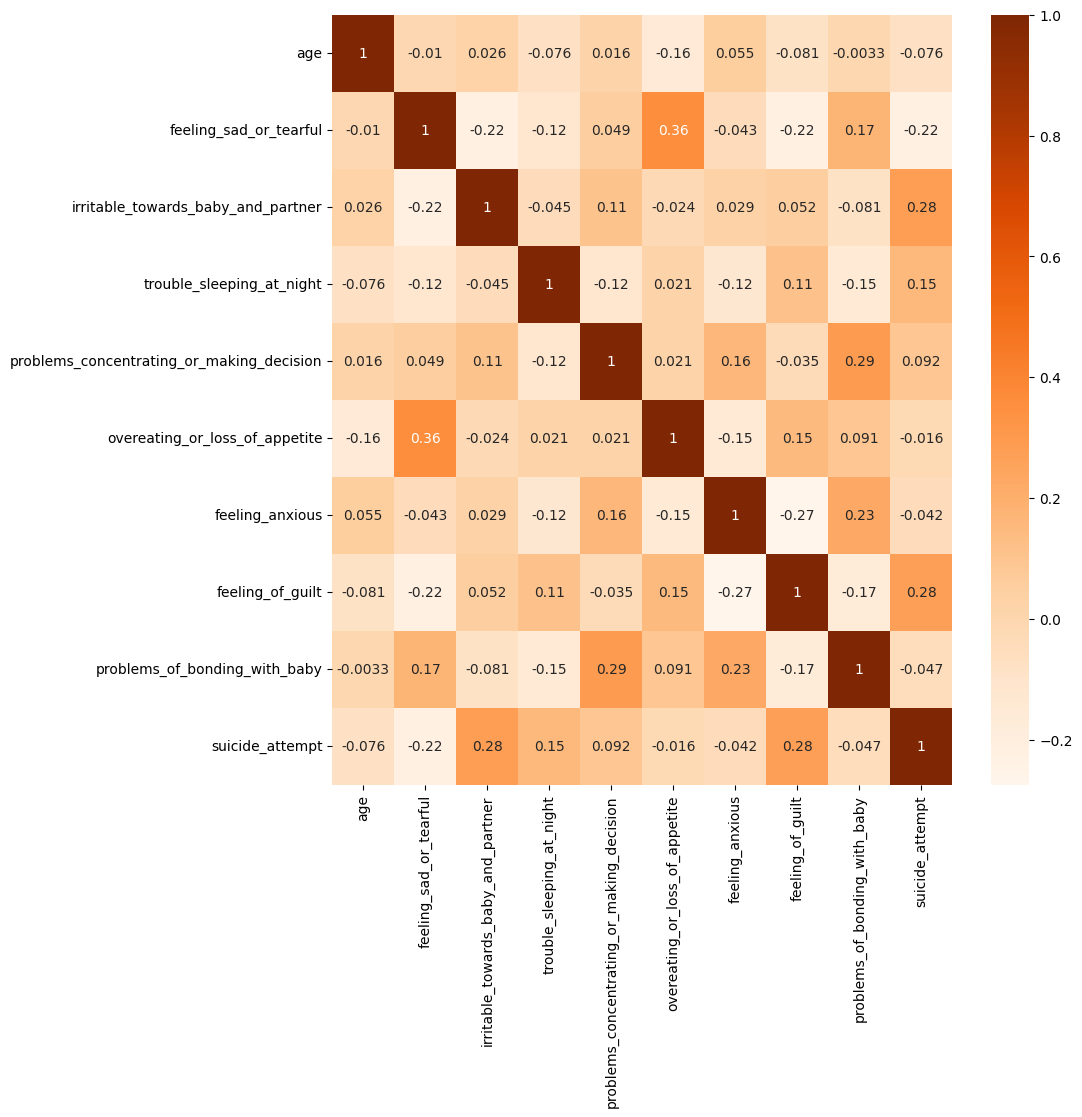

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(ppdd.corr() , annot = True , cmap = "Oranges")
plt.show()

In [21]:
corr = ppdd.corr()

In [22]:
corr_feeling_anxious = corr['feeling_anxious']

# Sort the correlation values in descending order
sorted_corr = corr_feeling_anxious.sort_values(ascending=False)

# top correlated features
top_corr_features = sorted_corr.index[1:6]  # Exclude the first index because it's 'Feeling anxious' itself

top_corr_features

Index(['problems_of_bonding_with_baby',
       'problems_concentrating_or_making_decision', 'age',
       'irritable_towards_baby_and_partner', 'suicide_attempt'],
      dtype='object')

## Training

### Importing libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


### Test Train Spilt

In [24]:
ppdd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        1491 non-null   int64
 1   feeling_sad_or_tearful                     1491 non-null   int64
 2   irritable_towards_baby_and_partner         1491 non-null   int64
 3   trouble_sleeping_at_night                  1491 non-null   int64
 4   problems_concentrating_or_making_decision  1491 non-null   int64
 5   overeating_or_loss_of_appetite             1491 non-null   int64
 6   feeling_anxious                            1491 non-null   int64
 7   feeling_of_guilt                           1491 non-null   int64
 8   problems_of_bonding_with_baby              1491 non-null   int64
 9   suicide_attempt                            1491 non-null   int64
dtypes: int64(10)
memory usage: 128.1 KB


In [27]:
y = ppdd.feeling_anxious
ppdd_features = ppdd[['problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision', 'age', 'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)


In [28]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   problems_of_bonding_with_baby              1192 non-null   int64
 1   problems_concentrating_or_making_decision  1192 non-null   int64
 2   age                                        1192 non-null   int64
 3   irritable_towards_baby_and_partner         1192 non-null   int64
 4   suicide_attempt                            1192 non-null   int64
dtypes: int64(5)
memory usage: 55.9 KB
None


In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Fit the model
clf.fit(X, y)

# Calculate feature importances (information gain)
feature_importances = clf.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: Importance = {importance}")

Feature 0: Importance = 0.18075870546172276
Feature 1: Importance = 0.1626981127970004
Feature 2: Importance = 0.21340015484595135
Feature 3: Importance = 0.33540540111483824
Feature 4: Importance = 0.10773762578048729


In [30]:
print(ppdd.shape)
print(X_train.shape)

(1491, 10)
(1192, 5)


In [32]:
y = ppdd.feeling_anxious
ppdd_features = ppdd[['problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision', 'age', 'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = y_train.astype(int)

In [34]:
print(X_train.shape)
X_train.head()

(1118, 5)


,problems_of_bonding_with_baby,problems_concentrating_or_making_decision,age,irritable_towards_baby_and_partner,suicide_attempt
179,1,0,1,0,1
1452,1,0,3,0,2
1493,1,1,4,0,0
851,2,0,0,2,1
1350,1,0,0,0,0


### Decision tree
* Accuracy: 0.903485254691689
* Precision: 0.9439655172413793
* Recall: 0.9049586776859504
* F1 Score:  0.9240506329113924

[0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 0]


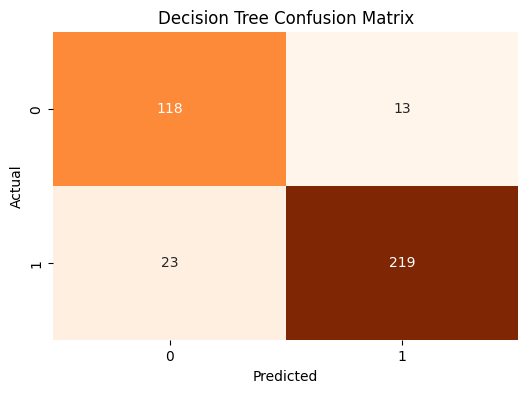

Cross-validation scores: [0.93303571 0.90625    0.875      0.9058296  0.90134529]
Mean cross-validation score: 0.9042921204356181
Decision Tree Metrics:
Accuracy: 0.903485254691689
Precision: 0.9439655172413793
Recall: 0.9049586776859504
F1 Score: 0.9240506329113924


In [35]:
dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = dtree_classifier.predict(X_test)
print(y_pred_dtree)

# Confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

scores = cross_val_score(dtree_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Evaluation metrics
accuracy_dtree = metrics.accuracy_score(y_test, y_pred_dtree)
precision_dtree = metrics.precision_score(y_test, y_pred_dtree)
recall_dtree = metrics.recall_score(y_test, y_pred_dtree)
f1_dtree = metrics.f1_score(y_test, y_pred_dtree)
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1 Score:", f1_dtree)

In [36]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       131
           1       0.94      0.90      0.92       242

    accuracy                           0.90       373
   macro avg       0.89      0.90      0.90       373
weighted avg       0.91      0.90      0.90       373



### Random Forest
* Accuracy: 0.9088471849865952
* Precision: 0.940677966101695
* Recall: 0.9173553719008265
* F1 Score: 0.9288702928870294

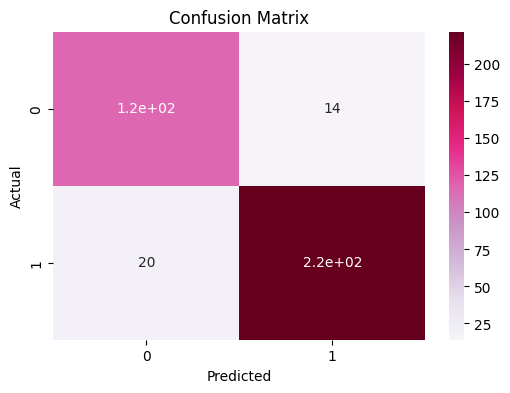

Cross-validation scores: [0.93303571 0.88839286 0.85714286 0.89686099 0.89686099]
Mean cross-validation score: 0.8944586803331198
Random Forest Metrics:
Accuracy: 0.9088471849865952
Precision: 0.940677966101695
Recall: 0.9173553719008265
F1 Score: 0.9288702928870294


In [37]:
# Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=150, max_depth=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap='PuRd', cbar='True')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

scores = cross_val_score(random_forest, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Random Forest Metrics:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
recall= metrics.recall_score(y_test, y_pred)

### Support Vector Machine
* Accuracy: 0.8016085790884718
* Precision: 0.8065693430656934
* Recall: 0.9132231404958677
* F1 Score: 0.8565891472868217

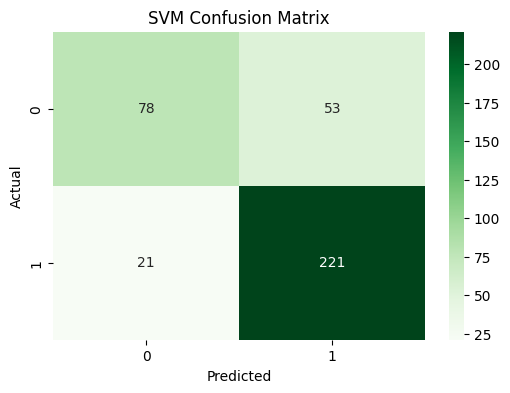

SVM Metrics:
Cross-validation scores: [0.85714286 0.75446429 0.73660714 0.78923767 0.77578475]
Mean cross-validation score: 0.7826473414477899
Accuracy: 0.8016085790884718
Precision: 0.8065693430656934
Recall: 0.9132231404958677
F1 Score: 0.8565891472868217
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       131
           1       0.81      0.91      0.86       242

    accuracy                           0.80       373
   macro avg       0.80      0.75      0.77       373
weighted avg       0.80      0.80      0.79       373



In [40]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation
print("SVM Metrics:")
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Evaluation metrics
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
precision_svm = metrics.precision_score(y_test, y_pred_svm)
recall_svm = metrics.recall_score(y_test, y_pred_svm)
f1_svm = metrics.f1_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print(classification_report(y_test, y_pred_svm))

### Logistic Regression Classifier
* Accuracy: 0.6648793565683646
* Precision: 0.6869009584664537
* Recall: 0.8884297520661157
* F1 Score: 0.7747747747747749

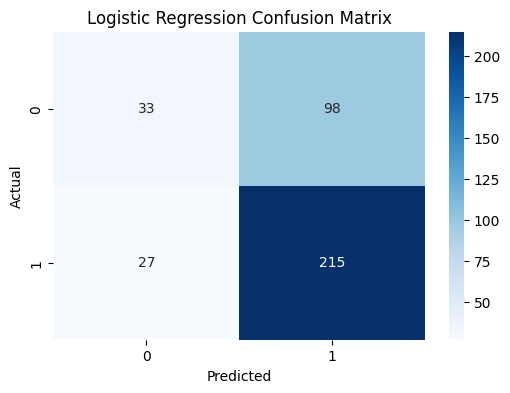

Logistic Regression Metrics:
Cross-validation scores: [0.65178571 0.67410714 0.61607143 0.67264574 0.68161435]
Mean cross-validation score: 0.6592448750800768
Accuracy: 0.6648793565683646
Precision: 0.6869009584664537
Recall: 0.8884297520661157
F1 Score: 0.7747747747747749


In [43]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_classifier.predict(X_test)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation
print("Logistic Regression Metrics:")
scores = cross_val_score(logistic_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Evaluation metrics
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
f1_lr = metrics.f1_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


### KNN
* Precision: 0.8858267716535433
* Accuracy: 0.8766756032171582
* Recall: 0.9297520661157025
* F1 Score: 0.907258064516129

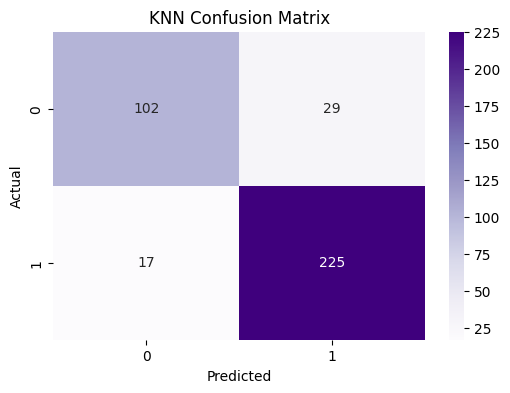

KNN Metrics:
Cross-validation scores: [0.88839286 0.85267857 0.84375    0.87892377 0.8206278 ]
Mean cross-validation score: 0.856874599615631
Accuracy: 0.8766756032171582
Precision: 0.8858267716535433
Recall: 0.9297520661157025
F1 Score: 0.907258064516129


In [44]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation metrics
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
precision_knn = metrics.precision_score(y_test, y_pred_knn)
recall_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

In [ ]:
print(classification_report(y_test, y_pred_knn))

### XGBoost
* Accuracy: 0.9061662198391421
* Precision: 0.948051948051948
* Recall: 0.9049586776859504
* F1 Score: 0.9260042283298097

In [46]:
from xgboost import XGBClassifier

# Create and fit the model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

#cross validation
print("XGBoost Metrics:")
scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Evaluation metrics
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb)
recall_xgb = metrics.recall_score(y_test, y_pred_xgb)
f1_xgb = metrics.f1_score(y_test, y_pred_xgb)

print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


XGBoost Metrics:
Cross-validation scores: [0.93303571 0.89732143 0.85714286 0.90134529 0.9058296 ]
Mean cross-validation score: 0.8989349775784753
XGBoost Metrics:
Accuracy: 0.9061662198391421
Precision: 0.948051948051948
Recall: 0.9049586776859504
F1 Score: 0.9260042283298097


### Neural Network
* Neural Network Accuracy: 0.8632707595825195
* Neural Network Loss: 0.31391727924346924
* Neural Network Precision: 0.9321266968325792
* Neural Network Recall: 0.8512396694214877
* Neural Network F1 Score: 0.889848812095032


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
loss, accuracy_nn = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy_nn)
print("Neural Network Loss:", loss)
print("Neural Network Precision:", metrics.precision_score(y_test, y_pred_nn))
print("Neural Network Recall:", metrics.recall_score(y_test, y_pred_nn))
print("Neural Network F1 Score:", metrics.f1_score(y_test, y_pred_nn))

Epoch 1/100
35/35 [==============================] - 1s 3ms/step - loss: 0.6307 - accuracy: 0.6494
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6878
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7182
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.7272
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.7299
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.7460
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7540
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7692
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7648
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7889
Epoch 11/

### Voting classifier  
* Accuracy: 0.8981233243967829
* Precision: 0.9434782608695652
* Recall: 0.8966942148760331
* F1 Score: 0.9194915254237288


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [49]:
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC()
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
estimators = [('dt', clf1), ('knn', clf2), ('svm', clf3), ('rf', clf4)]

In [51]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y)
    print(estimator[0], scores.mean())

dt 0.9242598370406949
knn 0.8840407622724518
svm 0.812944715045678
rf 0.9282821934412248


In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
vc = VotingClassifier(estimators=estimators)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=48)
scores = cross_val_score(vc, X, y, cv=cv, scoring='accuracy')
print("crossvalidation mean:", scores.mean())
accuracy_vc = metrics.accuracy_score(y_test, y_pred_vc)
print("Voting Classifier Accuracy:", accuracy_vc)
#evalution metrics
precision_vc = metrics.precision_score(y_test, y_pred_vc)
recall_vc = metrics.recall_score(y_test, y_pred_vc)
f1_vc = metrics.f1_score(y_test, y_pred_vc)

print("Voting Classifier Metrics:")
print("Accuracy:", accuracy_vc)
print("Precision:", precision_vc)
print("Recall:", recall_vc)
print("F1 Score:", f1_vc)

crossvalidation mean: 0.9085707017425723
Voting Classifier Accuracy: 0.8981233243967829
Voting Classifier Metrics:
Accuracy: 0.8981233243967829
Precision: 0.9434782608695652
Recall: 0.8966942148760331
F1 Score: 0.9194915254237288


In [55]:
# #weighted voting classifier
# for i in range(1, 5):
#     for j in range(1, 5):
#         for k in range(1, 5):
#             for l in range(1, 5):
#                 vc = VotingClassifier(estimators=estimators, voting='hard',weights=[i, j, k ,l])
#                 scores = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
#                 print(i, j, k, l, scores.mean())

### Stacking
* Stacking Classifier Accuracy: 0.9364548494983278
* Stacking Classifier Precision: 0.9601990049751243
* Stacking Classifier Recall: 0.946078431372549
* Stacking Classifier F1 Score: 0.9530864197530864

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('XGB', XGBClassifier())]

# Initialize meta-classifier
meta_classifier = LogisticRegression(penalty = 'l2', C = 0.01)

# Initialize stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier,cv=5)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the stacking classifier
print("evaluation of logistic regression as meta classifier:")
# cross_val_scores = cross_val_score(stacking_classifier, X, y, cv=5)
accuracy_stacking = metrics.accuracy_score(y_test, y_pred_stacking)
precision_stacking = metrics.precision_score(y_test, y_pred_stacking)
recall_stacking = metrics.recall_score(y_test, y_pred_stacking)
f1_stacking = metrics.f1_score(y_test, y_pred_stacking)
# print("Mean cross-validation score:", cross_val_scores.mean())
print("Stacking Classifier Accuracy:", accuracy_stacking)
print("Stacking Classifier Precision:", precision_stacking)
print("Stacking Classifier Recall:", recall_stacking)
print("Stacking Classifier F1 Score:", f1_stacking)

evaluation of logistic regression as meta classifier:
Stacking Classifier Accuracy: 0.9364548494983278
Stacking Classifier Precision: 0.9601990049751243
Stacking Classifier Recall: 0.946078431372549
Stacking Classifier F1 Score: 0.9530864197530864


Multilayered Stacking Classifier

evalution metrics for multilayered lr stacking classifier
Accuracy: 0.939799331103679
precision: 0.9744897959183674
recall: 0.9362745098039216
f1_score: 0.9550000000000001


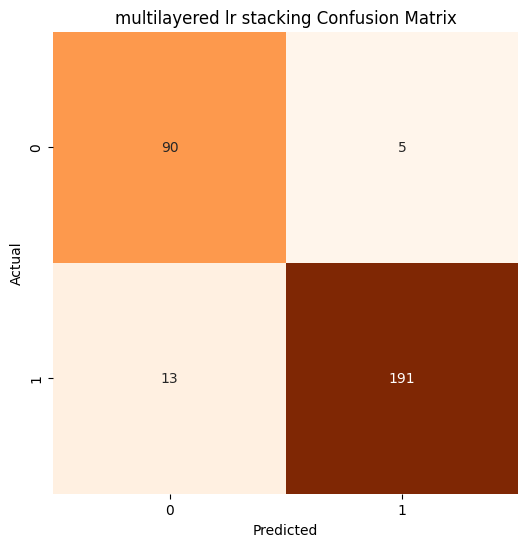

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

confusion_matrix(y_test, y_pred_stacking)
# Assuming you have your data loaded and preprocessed as X and y

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='rbf', random_state=42, C=1)),
    ('rf', RandomForestClassifier())
]

# Meta classifiers layer 1
meta_classifiers_layer1 = [
    ('xgboost', XGBClassifier()),
    ('svm', SVC( kernel='rbf', random_state=42, C=1, gamma=0.1)),
    ('nn', MLPClassifier(hidden_layer_sizes=(100, 50),activation='relu', max_iter=500, random_state=42))
]

# Meta classifier layer 2
meta_classifier_layer2 = LogisticRegression(penalty='l2', C=1, random_state=42)

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=StackingClassifier(estimators=meta_classifiers_layer1, final_estimator=meta_classifier_layer2 ),cv=5
)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predicting the test set
y_pred_stacking = stacking_clf.predict(X_test)


# Evaluating the model
cm_stacking =confusion_matrix(y_test, stacking_clf.predict(X_test))
plt.figure(figsize=(6,6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('multilayered lr stacking Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("evalution metrics for multilayered lr stacking classifier")
print("Accuracy:", metrics.accuracy_score(y_test, stacking_clf.predict(X_test)))
print("precision:", metrics.precision_score(y_test, stacking_clf.predict(X_test)))
print("recall:", metrics.recall_score(y_test, stacking_clf.predict(X_test)))
print("f1_score:", metrics.f1_score(y_test, stacking_clf.predict(X_test)))
